In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('/content/parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.shape

(195, 24)

In [ ]:
df.tail(18)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
177,phon_R01_S44_1,151.737,190.204,129.859,0.00314,0.00002,0.00135,0.00162,0.00406,0.01469,0.132,0.00728,0.00886,0.01230,0.02184,0.00570,24.151,1,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703
178,phon_R01_S44_2,148.790,158.359,138.990,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.142,0.00839,0.00956,0.01309,0.02518,0.00488,24.412,1,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
179,phon_R01_S44_3,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,0.00725,0.00876,0.01263,0.02175,0.00540,23.683,1,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730
180,phon_R01_S44_4,150.440,163.441,144.736,0.00396,0.00003,0.00206,0.00233,0.00619,0.02551,0.237,0.01321,0.01574,0.02148,0.03964,0.00611,23.133,1,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
181,phon_R01_S44_5,148.462,161.078,141.998,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.163,0.00950,0.01103,0.01559,0.02849,0.00639,22.866,1,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710
182,phon_R01_S44_6,149.818,163.417,144.786,0.00336,0.00002,0.00174,0.00198,0.00521,0.02145,0.198,0.01155,0.01341,0.01666,0.03464,0.00595,23.008,1,0.329577,0.757180,-6.277170,0.109397,2.209021,0.156368
183,phon_R01_S49_1,117.226,123.925,106.656,0.00417,0.00004,0.00186,0.00270,0.00558,0.01909,0.171,0.00864,0.01223,0.01949,0.02592,0.00955,23.079,0,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724
184,phon_R01_S49_2,116.848,217.552,99.503,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.163,0.00810,0.01144,0.01756,0.02429,0.01179,22.085,0,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
185,phon_R01_S49_3,116.286,177.291,96.983,0.00314,0.00003,0.00134,0.00192,0.00403,0.01564,0.136,0.00667,0.00990,0.01691,0.02001,0.00737,24.199,0,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
186,phon_R01_S49_4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,0.154,0.00820,0.00972,0.01491,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605


In [ ]:
strings = df['name']   #Source: https://www.kite.com/python/answers/how-to-check-if-a-list-contains-a-substring-in-python
substring = "_7"

substring_in_list = any(substring in string for string in strings)

print(substring_in_list)

True


In [ ]:
matching = [s for s in df['name'] if "_7" in s] #Source: https://stackoverflow.com/questions/4843158/how-to-check-if-a-string-is-a-substring-of-items-in-a-list-of-strings
matching

['phon_R01_S21_7', 'phon_R01_S27_7', 'phon_R01_S35_7']

In [ ]:
df.loc[df['name']=='phon_R01_S21_7']

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
90,phon_R01_S21_7,166.605,206.008,78.032,0.00742,0.00004,0.00387,0.00453,0.01161,0.0664,0.634,0.0365,0.04282,0.05114,0.10949,0.08725,11.744,1,0.65341,0.733165,-4.508984,0.389232,3.317586,0.301952


In [ ]:
df.loc[df['name']=='phon_R01_S27_7']

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
121,phon_R01_S27_7,176.824,215.293,83.961,0.0046,0.00003,0.00209,0.00221,0.00628,0.01169,0.117,0.00534,0.0063,0.01104,0.01603,0.01161,27.166,1,0.400088,0.656182,-4.711007,0.281618,2.655744,0.234809


In [ ]:
df.loc[df['name']=='phon_R01_S35_7']

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,1.018,0.04284,0.05556,0.08318,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721


In [ ]:
df = df.drop([df.index[90], df.index[121], df.index[152]])
df.shape 

(192, 24)

In [ ]:
def get_range(df, start, finish):  #Source: https://stackoverflow.com/questions/50805446/pandas-select-range-from-index-column
             return df[start:finish]
print(get_range(df, 76,100))

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
76   phon_R01_S19_5      112.876       148.826  ...  0.341169  2.007923  0.193918
77   phon_R01_S19_6      110.568       125.394  ...  0.250572  1.777901  0.232744
78   phon_R01_S20_1       95.385       102.145  ...  0.249494  2.017753  0.260015
79   phon_R01_S20_2      100.770       115.697  ...  0.265699  2.398422  0.277948
80   phon_R01_S20_3       96.106       108.664  ...  0.155097  2.645959  0.327978
81   phon_R01_S20_4       95.605       107.715  ...  0.210458  2.232576  0.260633
82   phon_R01_S20_5      100.960       110.019  ...  0.146948  2.428306  0.264666
83   phon_R01_S20_6       98.804       102.305  ...  0.078202  2.053601  0.177275
84   phon_R01_S21_1      176.858       205.560  ...  0.343073  3.099301  0.242119
85   phon_R01_S21_2      180.978       200.125  ...  0.315903  3.098256  0.200423
86   phon_R01_S21_3      178.222       202.450  ...  0.335753  2.654271  0.144614
87   phon_R01_S2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              192 non-null    object 
 1   MDVP:Fo(Hz)       192 non-null    float64
 2   MDVP:Fhi(Hz)      192 non-null    float64
 3   MDVP:Flo(Hz)      192 non-null    float64
 4   MDVP:Jitter(%)    192 non-null    float64
 5   MDVP:Jitter(Abs)  192 non-null    float64
 6   MDVP:RAP          192 non-null    float64
 7   MDVP:PPQ          192 non-null    float64
 8   Jitter:DDP        192 non-null    float64
 9   MDVP:Shimmer      192 non-null    float64
 10  MDVP:Shimmer(dB)  192 non-null    float64
 11  Shimmer:APQ3      192 non-null    float64
 12  Shimmer:APQ5      192 non-null    float64
 13  MDVP:APQ          192 non-null    float64
 14  Shimmer:DDA       192 non-null    float64
 15  NHR               192 non-null    float64
 16  HNR               192 non-null    float64
 1

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,153.817917,196.776349,116.389750,0.006114,0.000044,0.003245,0.003377,0.009737,0.029314,0.277448,0.015468,0.017612,0.023701,0.046404,0.023873,21.976073,0.750000,0.497796,0.718154,-5.710404,0.224700,2.371348,0.204615
std,41.548965,92.158243,43.508538,0.004642,0.000034,0.002852,0.002598,0.008554,0.018308,0.186884,0.009898,0.011635,0.016387,0.029694,0.039213,4.288654,0.434145,0.103722,0.055515,1.073304,0.082583,0.374673,0.088719
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.262000,134.549750,85.286250,0.003450,0.000020,0.001658,0.001855,0.004975,0.016537,0.148750,0.008268,0.009585,0.013085,0.024802,0.005890,19.251750,0.750000,0.421768,0.674855,-6.456900,0.173470,2.094037,0.136103
50%,148.367000,172.917500,104.376000,0.004940,0.000030,0.002485,0.002680,0.007455,0.022965,0.219000,0.012780,0.013450,0.018125,0.038335,0.011545,22.152000,1.000000,0.493649,0.722170,-5.730418,0.217525,2.352424,0.193324
75%,182.393500,224.093750,139.504250,0.007285,0.000060,0.003747,0.003912,0.011250,0.037610,0.348500,0.019063,0.021882,0.029198,0.057193,0.024960,25.053750,1.000000,0.586366,0.762563,-5.127827,0.271301,2.614510,0.252080
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Check for duplicate rows

In [ ]:
df.duplicated().sum() #no duplicate rows

0

# Check for missing values

In [ ]:
df.isnull().sum() #no missing values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

# Univariate visuals for target and all features

In [ ]:
df.head(15)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
import numpy as np

In [ ]:
# Group every six rows in dataframe and average column values.  (Six sets of data per individual in the study)
grouped_df = df.groupby(np.arange(len(df.index))//6, axis=0).mean() #source: link below

https://stackoverflow.com/questions/46478518/groupby-dataframe-by-n-columns-or-n-rows

In [ ]:
grouped_df.shape

(32, 23)

In [ ]:
grouped_df['status'].value_counts() #This grouped value_counts indicates an issue with 3 of the study members
# having both diagnoses of parkinsons and not parkinsons.  Before I decide what to do, I need to spend more 
# time looking at why this is the case.

1    24
0     8
Name: status, dtype: int64

In [ ]:
parkinsons = len(df.loc[df['status']==1]) #find number in study diagnosed with PD
no_parkinsons = len(df.loc[df['status']==0])

This visual is showing the total number of diagnoses.  This is not adjusted for individual people.  

# Produce and evaluate a correlation heatmap




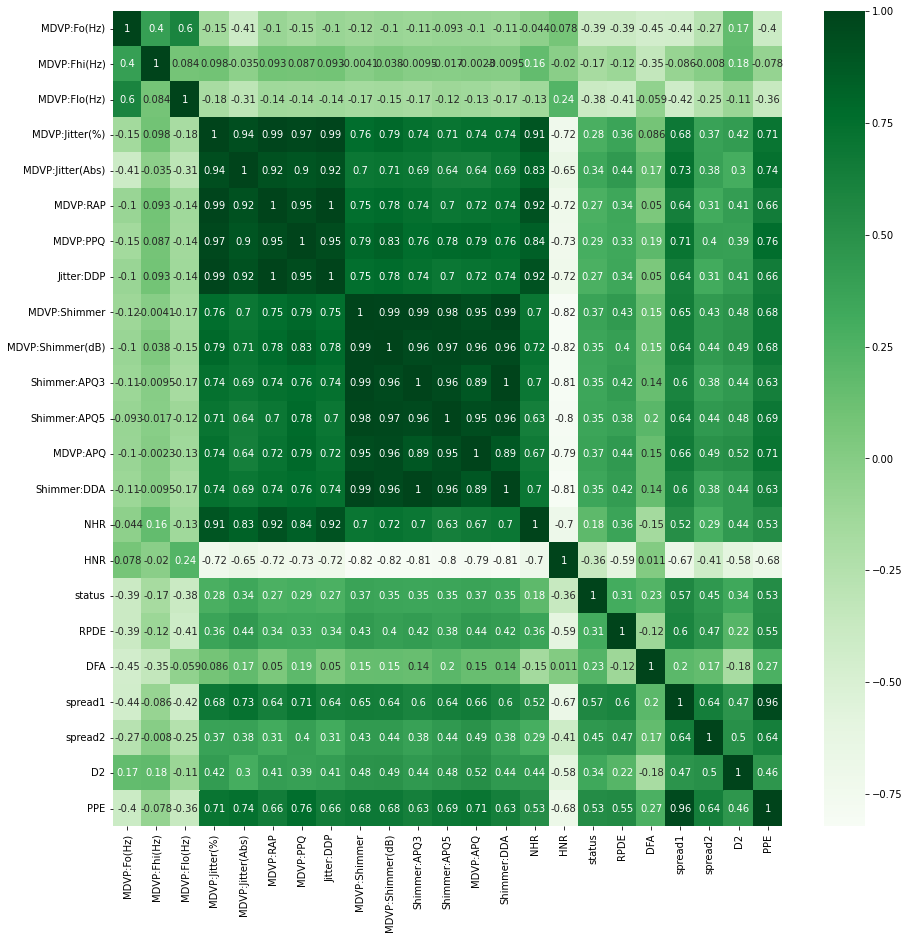

In [ ]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, cmap = 'Greens', annot=True)

There are moderate correlations between status (Parkinson's diagnosis) and PPE, spread1, and spread2.  These are 0.53, 0.56, and 0.45, respectively.  

# Model Validation


In [ ]:
y = df['status']
X = df.drop(columns = ['status', 'name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)','MDVP:Flo(Hz)', 'MDVP:RAP', 'MDVP:PPQ', 'MDVP:APQ', 'spread1', 'spread2','D2' ])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
df.shape

(192, 24)

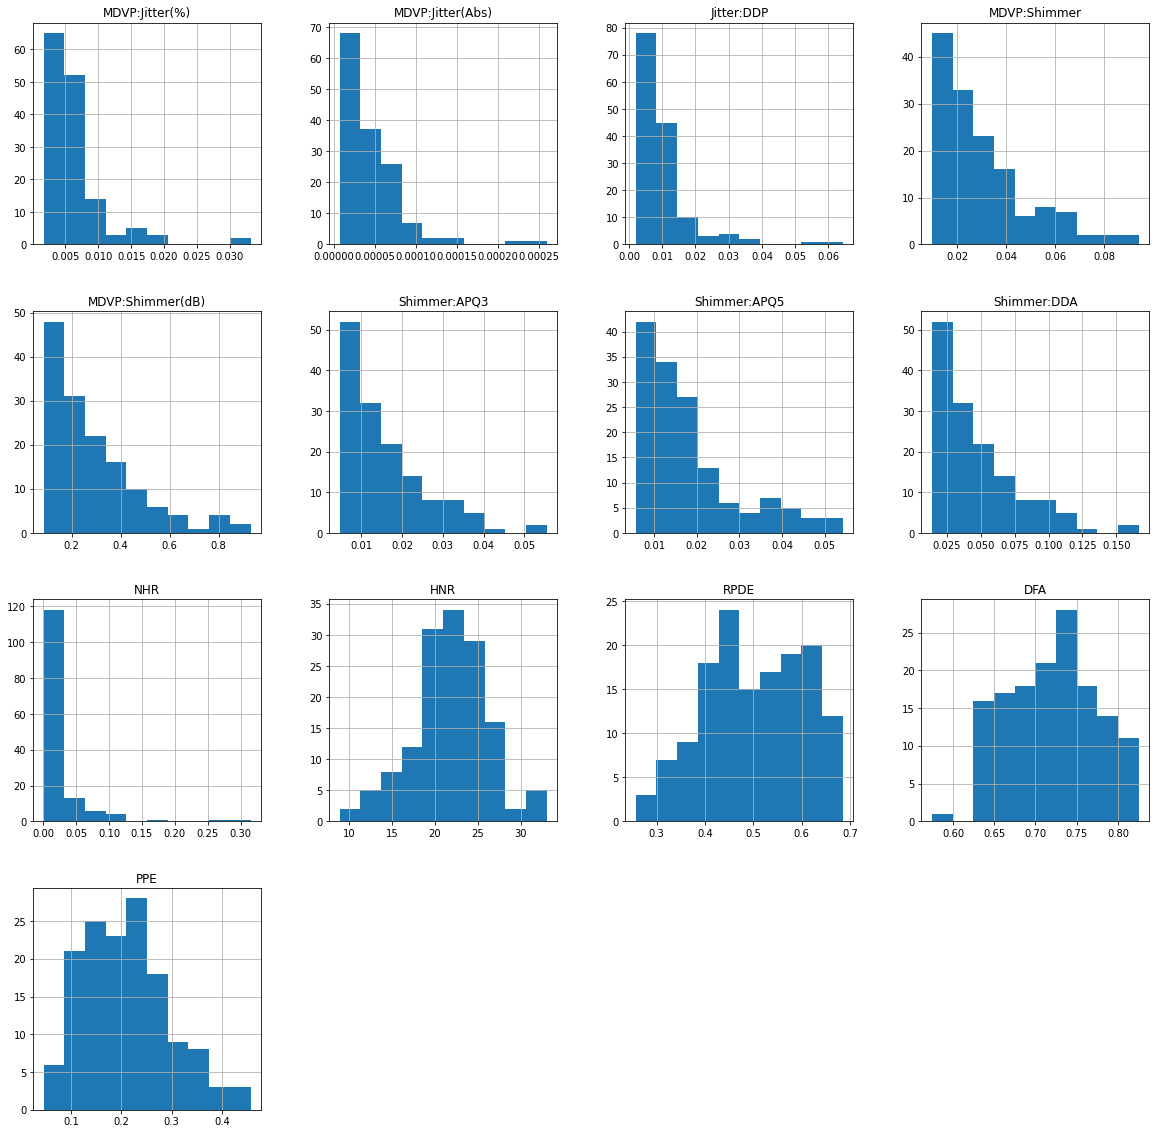

In [ ]:
X_train.hist(figsize=(20,20));


# Identify Outliers

In [ ]:
Q1 = X_train.quantile(0.25)  # Source: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
Q3 = X_train.quantile(0.75)  # Calculating Q1, Q3 and the Interquartile Range
IQR = Q3 - Q1
print(IQR)

MDVP:Jitter(%)      0.003925
MDVP:Jitter(Abs)    0.000030
Jitter:DDP          0.006383
MDVP:Shimmer        0.022375
MDVP:Shimmer(dB)    0.210250
Shimmer:APQ3        0.011975
Shimmer:APQ5        0.013500
Shimmer:DDA         0.035925
NHR                 0.019527
HNR                 5.954750
RPDE                0.164064
DFA                 0.085463
PPE                 0.121390
dtype: float64


In [ ]:
print(X_train < (Q1 - 1.5 * IQR)) or (X_train > (Q3 + 1.5 * IQR))  # Source: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

# Identifying the outliers which fall 1.5 times the interquartile range below the 1st quartile OR 1.5 times the interquartile
# range above the third quartile

     MDVP:Jitter(%)  MDVP:Jitter(Abs)  Jitter:DDP  ...   RPDE    DFA    PPE
24            False             False       False  ...  False  False  False
166           False             False       False  ...  False  False  False
35            False             False       False  ...  False  False  False
109           False             False       False  ...  False  False  False
94            False             False       False  ...  False  False  False
..              ...               ...         ...  ...    ...    ...    ...
9             False             False       False  ...  False  False  False
120           False             False       False  ...  False  False  False
132           False             False       False  ...  False  False  False
110           False             False       False  ...  False  False  False
153           False             False       False  ...  False  False  False

[144 rows x 13 columns]


,MDVP:Jitter(%),MDVP:Jitter(Abs),Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
24,False,False,False,False,False,False,False,False,False,False,False,False,False
166,False,False,False,False,False,False,False,False,False,False,False,False,False
35,False,False,False,False,False,False,False,False,False,False,False,False,False
109,False,False,False,False,False,False,False,False,False,False,False,False,False
94,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,False,False,False,False,False,False,False,False,False,False,False,False,False
120,False,False,False,False,False,False,False,False,False,False,False,False,False
132,False,False,False,False,False,False,False,False,False,False,False,False,False
110,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_train_ready = X_train[~((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)] # This code (also from source above) creates a 
X_train_ready.shape

(126, 13)

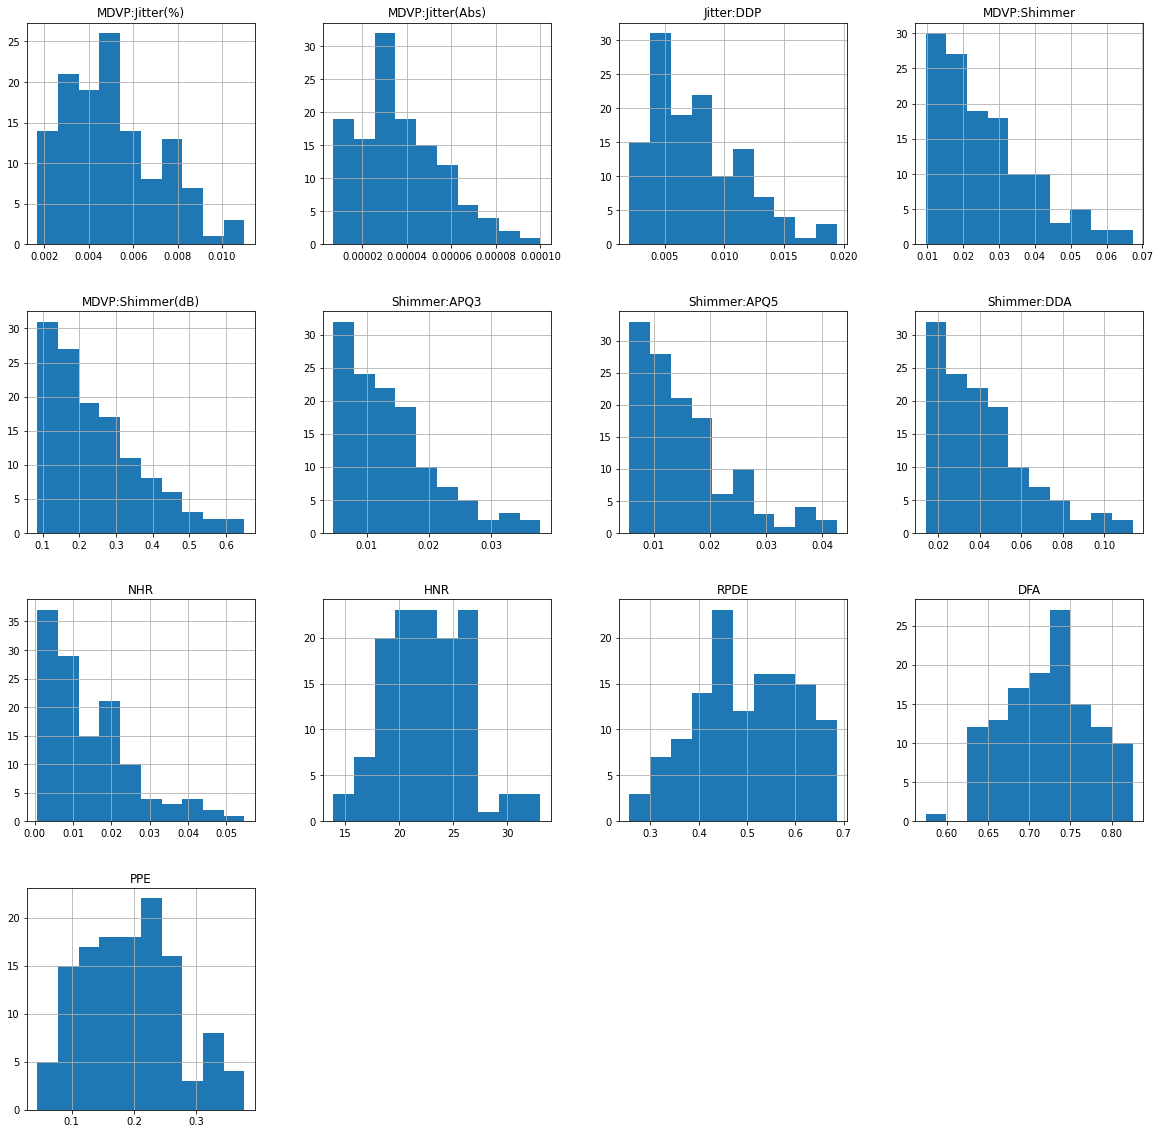

In [ ]:
X_train_ready.hist(figsize = (20,20));    # Outliers removed

# Default Classifier Model

In [ ]:
df['status'].value_counts(normalize = 'True')

1    0.75
0    0.25
Name: status, dtype: float64

In [ ]:
all_ones = np.ones(len(y_test))
all_ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
class_report_default = classification_report(y_test, all_ones);
print(class_report_default)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.75      1.00      0.86        36

    accuracy                           0.75        48
   macro avg       0.38      0.50      0.43        48
weighted avg       0.56      0.75      0.64        48



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN ** Basic Model** on Averaged Data

In [ ]:
scaler = StandardScaler ()
scaled_df = scaler.fit_transform(X_train)

In [ ]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

numeric_selector = make_column_selector(dtype_include = 'number')
scaler_tuple = (scaler, numeric_selector)
col_transformer = make_column_transformer(scaler_tuple, remainder = 'passthrough')
pipe = make_pipeline(col_transformer, knn)

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2e6a70fa10>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
y_pred = pipe.predict(X_test)
y_pred_knn_train = pipe.predict(X_train)

In [ ]:
knn_train_accuracy = accuracy_score(y_train, y_pred_knn_train)
print(f'KNN Train Accuracy: {knn_train_accuracy}')

KNN Train Accuracy: 0.8819444444444444


In [ ]:
knn_test_accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Test Accuracy: {knn_test_accuracy}')

KNN Test Accuracy: 0.8333333333333334


In [ ]:
class_report_knn_basic = classification_report(y_pred, y_test)
print(class_report_knn_basic)

              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.86      0.91      0.89        34

    accuracy                           0.83        48
   macro avg       0.81      0.78      0.79        48
weighted avg       0.83      0.83      0.83        48



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


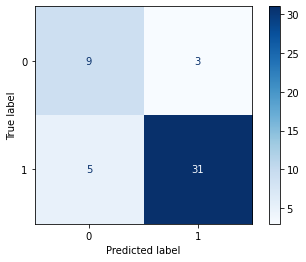

In [ ]:
plot_confusion_matrix(pipe, X_test, y_test, cmap = 'Blues');

# Optimize KNN on Averaged Data

Minimum error:- 0.0625 at K = 1


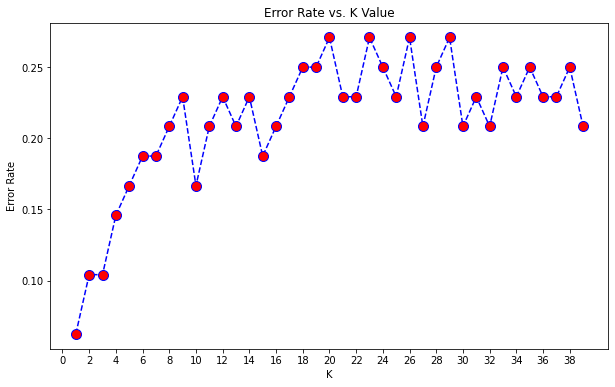

In [ ]:
error_rate = []   #source: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
for i in range(1,40):          #Finding minimum error
 knn1 = KNeighborsClassifier(n_neighbors=i)
 pipe_knn1 = make_pipeline(col_transformer,knn1)

 pipe_knn1.fit(X_train,y_train)
 pred_i = pipe_knn1.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.xticks(np.arange(0,40, step=2))
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Maximum accuracy:- 0.9375 at K = 1


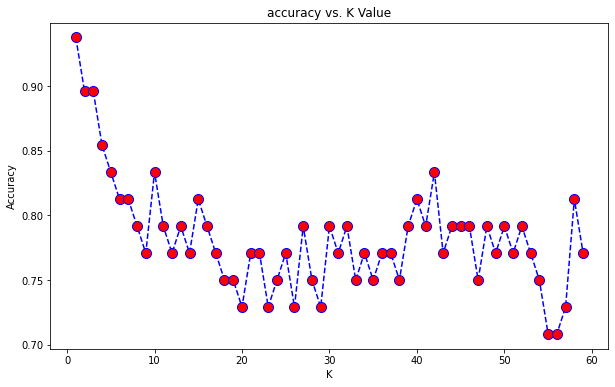

In [ ]:
acc = [] #source: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
from sklearn import metrics #finding maximum accuracy
for i in range(1,60):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    pipe_knn1 = make_pipeline(col_transformer,knn1)
    pipe_knn1.fit(X_train,y_train)    
    yhat = pipe_knn1.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,60),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",(acc.index(max(acc))+1))

In [ ]:
scaler = StandardScaler()
knn_n1 = KNeighborsClassifier(n_neighbors=1)

numeric_selector = make_column_selector(dtype_include = 'number')
scaler_tuple = (scaler, numeric_selector)
col_transformer = make_column_transformer(scaler_tuple, remainder = 'passthrough')
pipe1 = make_pipeline(col_transformer, knn_n1)

In [ ]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2e6ce199d0>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
y_pred_knn_n1 = pipe1.predict(X_test)

In [ ]:
y_pred_knn_n1_train = pipe1.predict(X_train)

In [ ]:
knn_n1_train_accuracy = accuracy_score(y_train, y_pred_knn_n1_train)
print(f'KNN with n_neighbors = 1 Train Accuracy: {knn_n1_train_accuracy}')

KNN with n_neighbors = 1 Train Accuracy: 1.0


In [ ]:
knn_n1_test_accuracy = accuracy_score(y_test, y_pred_knn_n1)
print(f'KNN with n_neighbors = 1 Test Accuracy: {knn_n1_test_accuracy}')

KNN with n_neighbors = 1 Test Accuracy: 0.9375


In [ ]:
class_report_knn_n1 = classification_report(y_test, y_pred_knn_n1)
print(class_report_knn_n1)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.95      0.97      0.96        36

    accuracy                           0.94        48
   macro avg       0.93      0.90      0.91        48
weighted avg       0.94      0.94      0.94        48



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


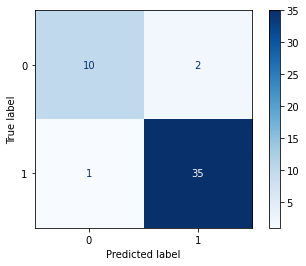

In [ ]:
plot_confusion_matrix(pipe1, X_test, y_test, cmap = 'Blues');

# Light Gradient Boosting Machine - Base Model

In [ ]:
lgb = LGBMClassifier()

In [ ]:
pipe_lgb = make_pipeline(col_transformer, lgb)

In [ ]:
pipe_lgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2e6ce199d0>)])),
                ('lgbmclassifier', LGBMClassifier())])

In [ ]:
y_pred_lgb_train = pipe_lgb.predict(X_train)
y_pred_lgb_test = pipe_lgb.predict(X_test)

In [ ]:
accuracy_lgb_train = accuracy_score(y_train, y_pred_lgb_train)
print(f'Light Gradient Boosting Train Accuracy: {accuracy_lgb_train}')

Light Gradient Boosting Train Accuracy: 1.0


In [ ]:
accuracy_lgb_test = accuracy_score(y_test, y_pred_lgb_test)
print(f'Light Gradient Boosting Test Accuracy: {accuracy_lgb_test}')

Light Gradient Boosting Test Accuracy: 0.875


In [ ]:
class_report_lgb = classification_report(y_test, y_pred_lgb_test)
print(class_report_lgb)

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.94      0.89      0.91        36

    accuracy                           0.88        48
   macro avg       0.83      0.86      0.84        48
weighted avg       0.88      0.88      0.88        48



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


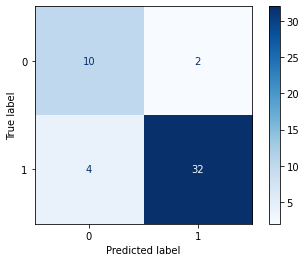

In [ ]:
plot_confusion_matrix(pipe_lgb, X_test, y_test, cmap = 'Blues');

# Light Gradient Boosting Machine - Optimized

In [ ]:
params = {'lgbmclassifier__max_depth': range(5,9),
          'lgbmclassifier__num_leaves': range(4,14),
          'lgbmclassifier__min_data_in_leaf': range(1,4)}

In [ ]:
lgb_gridsearch = GridSearchCV(pipe_lgb, params, cv = 5)

In [ ]:
lgb_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2e6ce199d0>)])),
                                       ('lgbmclassifier', LGBMClassifier())]),
             param_grid={'lgbmclassifier__max_depth': range(5, 9),
                         'lgbmclassifier__min_data_in_leaf': range(1, 4),
                         'lgbmclassifier__num_leaves': range(4, 14)})

In [ ]:
print(lgb_gridsearch.best_params_)

{'lgbmclassifier__max_depth': 5, 'lgbmclassifier__min_data_in_leaf': 2, 'lgbmclassifier__num_leaves': 4}


In [ ]:
lgb_model_1 = lgb_gridsearch.best_estimator_

In [ ]:
y_pred_lgb_model_1 = lgb_model_1.predict(X_test)

In [ ]:
lgb_best_test_accuracy = accuracy_score(y_test, y_pred_lgb_model_1)
print(f'Light Gradient Boosting Train Accuracy: {lgb_best_test_accuracy}')

Light Gradient Boosting Train Accuracy: 0.8541666666666666


In [ ]:
params1 = {'lgbmclassifier__max_depth': range(2,5),
          'lgbmclassifier__num_leaves': range(2,4),
          'lgbmclassifier__min_data_in_leaf': range(2,4)}

In [ ]:
gridsearch_lgb_2nd = GridSearchCV(pipe_lgb, params1, cv = 10)

In [ ]:
gridsearch_lgb_2nd.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2e6ce199d0>)])),
                                       ('lgbmclassifier', LGBMClassifier())]),
             param_grid={'lgbmclassifier__max_depth': range(2, 5),
                         'lgbmclassifier__min_data_in_leaf': range(2, 4),
                         'lgbmclassifier__num_leaves': range(2, 4)})

In [ ]:
print(gridsearch_lgb_2nd.best_params_)

{'lgbmclassifier__max_depth': 2, 'lgbmclassifier__min_data_in_leaf': 2, 'lgbmclassifier__num_leaves': 3}


In [ ]:
lgb_best = lgb_gridsearch.best_estimator_

In [ ]:
y_pred_lgb_best = lgb_best.predict(X_test)
y_pred_lgb_best_train = lgb_best.predict(X_train)

In [ ]:
lgb_best_train_accuracy = accuracy_score(y_train, y_pred_lgb_best_train)
print(f'Light Gradient Boosting Optimized Train Accuracy: {lgb_best_train_accuracy}')

Light Gradient Boosting Optimized Train Accuracy: 1.0


In [ ]:
lgb_best_test_accuracy = accuracy_score(y_test, y_pred_lgb_best)
print(f'Light Gradient Boosting Test Optimized Accuracy: {lgb_best_test_accuracy}')

Light Gradient Boosting Test Optimized Accuracy: 0.8541666666666666


In [ ]:
class_report_lgb_best = classification_report(y_test, y_pred_lgb_best)
print(class_report_lgb_best)

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.87      0.94      0.91        36

    accuracy                           0.85        48
   macro avg       0.82      0.76      0.79        48
weighted avg       0.85      0.85      0.85        48



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


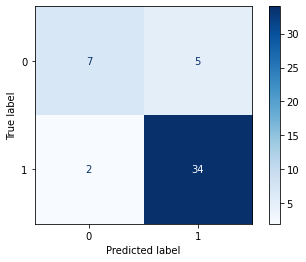

In [ ]:
plot_confusion_matrix(lgb_best, X_test, y_test, cmap = 'Blues');

# Extreme Gradient Boosting Machine - Base Model

In [ ]:
xgb = XGBClassifier()

In [ ]:
pipe_xgb = make_pipeline(col_transformer, xgb)

In [ ]:
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2e6ce199d0>)])),
                ('xgbclassifier', XGBClassifier())])

In [ ]:
y_pred_xgb_test = pipe_xgb.predict(X_test)
y_pred_xgb_train = pipe_xgb.predict(X_train)

In [ ]:
xgb_train_accuracy = accuracy_score(y_train, y_pred_xgb_train)
print(f'Extreme Gradient Boosting Train Accuracy: {xgb_train_accuracy}')

Extreme Gradient Boosting Train Accuracy: 1.0


In [ ]:
xgb_test_accuracy = accuracy_score(y_test, y_pred_xgb_test)
print(f'Extreme Gradient Boosting Test Accuracy: {xgb_test_accuracy}')

Extreme Gradient Boosting Test Accuracy: 0.8958333333333334


In [ ]:
class_report_xgb = classification_report(y_pred_xgb_test, y_test)
print(class_report_xgb)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.92      0.94      0.93        35

    accuracy                           0.90        48
   macro avg       0.88      0.86      0.86        48
weighted avg       0.89      0.90      0.89        48



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


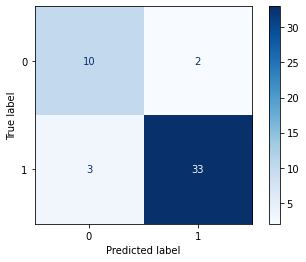

In [ ]:
plot_confusion_matrix(pipe_xgb, X_test, y_test, cmap = 'Blues');

In [ ]:
params = {
    'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.05, 0.1, 0.3, 0.5, 0.7],
    'xgbclassifier__max_depth': [2, 3, 5, 10, 15]}

In [ ]:
xgb_gridsearch = GridSearchCV(pipe_xgb, params, cv = 3, refit = True)

In [ ]:
xgb_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f2e6ce199d0>)])),
                                       ('xgbclassifier', XGBClassifier())]),
             param_grid={'xgbclassifier__learning_rate': [0.05, 0.1, 0.3, 0.5,
                                                          0.7],
                         'xgbclassifier__max_depth': [2, 3, 5, 10, 15],
                         'xgbclassifier__n_estimators': [50, 100, 150, 200]})

In [ ]:
print(xgb_gridsearch.best_params_)

{'xgbclassifier__learning_rate': 0.3, 'xgbclassifier__max_depth': 2, 'xgbclassifier__n_estimators': 150}


In [ ]:
xgb_opt_model = xgb_gridsearch.best_estimator_

In [ ]:
y_pred_xgb_opt_test = xgb_opt_model.predict(X_test)
y_pred_xgb_opt_train = xgb_opt_model.predict(X_train)

In [ ]:
xgb_opt_train_accuracy = accuracy_score(y_train, y_pred_xgb_opt_train)
print(f'Extreme Gradient Boosting Optimized Train Accuracy: {xgb_opt_train_accuracy}')

Extreme Gradient Boosting Optimized Train Accuracy: 1.0


In [ ]:
xgb_opt_test_accuracy = accuracy_score(y_test, y_pred_xgb_opt_test)
print(f'Extreme Gradient Boosting Optimized Test Accuracy: {xgb_opt_test_accuracy}')

Extreme Gradient Boosting Optimized Test Accuracy: 0.875


In [ ]:
class_report_xgb_opt = classification_report(y_pred_xgb_opt_test, y_test)
print(class_report_xgb_opt)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.92      0.92      0.92        36

    accuracy                           0.88        48
   macro avg       0.83      0.83      0.83        48
weighted avg       0.88      0.88      0.88        48



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


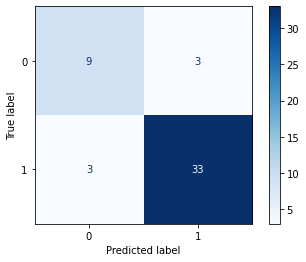

In [ ]:
plot_confusion_matrix(xgb_opt_model, X_test, y_test, cmap = 'Blues');

# Import Additional MDVP Data on Parkinsons Disease

In [ ]:
df_ParkData = pd.read_csv('https://raw.githubusercontent.com/pqrst/ParkinsonsDiseaseDataAnalysis/master/parkinsons_updrs.csv')

In [ ]:
df_ParkData.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
df_ParkData = df_ParkData.drop(columns = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Shimmer:APQ11'])

In [ ]:
df_ParkData.head()

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
df_ParkData.shape

(5875, 15)

Create an array of positive diagnoses of Parkinsons that is the length of the data set since all data is from those with Parkinsons Disease

In [ ]:
Positive_Parks = np.ones(len(df_ParkData['NHR']))

Rename columns to match those in original data set used to create model

In [ ]:
df_ParkData = df_ParkData.rename(columns={'Jitter(%)': 'MDVP:Jitter(%)', 'Jitter(Abs)': 'MDVP:Jitter(Abs)', 'Jitter:RAP': 'MDVP:RAP', 'Jitter:PPQ5': 'MDVP:PPQ', 'Shimmer': 'MDVP:Shimmer', 'Shimmer(dB)': 'MDVP:Shimmer(dB)'})


In [ ]:
y_pred_pipe_knn = pipe.predict(df_ParkData)

In [ ]:
accuracy_pipe_ParkData = accuracy_score(Positive_Parks, y_pred_pipe_knn)
print(accuracy_pipe_ParkData)

0.7496170212765958


In [ ]:
y_pred_pipe1_knn = pipe1.predict(df_ParkData)

In [ ]:
accuracy_pipe1_ParkData = accuracy_score(Positive_Parks, y_pred_pipe1_knn)
print(accuracy_pipe1_ParkData)

0.7339574468085106


In [ ]:
y_pred_pipe_lgb = pipe_lgb.predict(df_ParkData)

In [ ]:
accuracy_pipe_lgb_ParkData = accuracy_score(Positive_Parks, y_pred_pipe_lgb)
print(accuracy_pipe_lgb_ParkData)

0.788936170212766


In [ ]:
y_pred_lgb_best = lgb_best.predict(df_ParkData)

In [ ]:
accuracy_lgb_best_ParkData = accuracy_score(Positive_Parks, y_pred_lgb_best)
print(accuracy_lgb_best_ParkData)

0.8357446808510638


In [ ]:
y_pred_xgb = pipe_xgb.predict(df_ParkData)

In [ ]:
accuracy_xgb = accuracy_score(Positive_Parks, y_pred_xgb)
print(accuracy_xgb)

0.8493617021276596


In [ ]:
y_pred_xgb_opt = xgb_opt_model.predict(df_ParkData)

In [ ]:
accuracy_xgb_opt = accuracy_score(Positive_Parks, y_pred_xgb_opt)
print(accuracy_xgb_opt)

0.8549787234042553
